### _V18_ $ $ Der Germanium-Detektor

#### Vorläufige Auswertung

##### Pakete importieren

In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from uncertainties import ufloat
import uncertainties.unumpy as unp
from uncertainties.unumpy import nominal_values as noms, std_devs as stds, uarray as uar

plt.rcParams['figure.figsize']                 = [8,5]
plt.rcParams['figure.constrained_layout.use']  = True
plt.rcParams['legend.frameon']                 = False
plt.rcParams["xtick.minor.visible"]            = True
plt.rcParams["ytick.minor.visible"]            = True

##### Messdaten einlesen

In [2]:
eu = np.genfromtxt('data/test/eu.Spe', unpack=True, skip_header=12, skip_footer=14)
cs = np.genfromtxt('data/test/cs.Spe', unpack=True, skip_header=12, skip_footer=14)
ba_sb = np.genfromtxt('data/test/ba_sb.Spe', unpack=True, skip_header=12, skip_footer=14)
unknown = np.genfromtxt('data/test/unknown.Spe', unpack=True, skip_header=12, skip_footer=14)

##### Messzeiten einlesen

In [3]:
t_eu = np.genfromtxt('data/test/eu.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]
t_cs = np.genfromtxt('data/test/cs.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]
t_ba_sb = np.genfromtxt('data/test/ba_sb.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]
t_unknown = np.genfromtxt('data/test/unknown.Spe', unpack=True, skip_header=9, skip_footer=8208)[0]

#### Eu-152

##### Peaks zuordnen

Peaks: 11


Channel Count

[[ 105.  281.]
 [ 309. 4720.]
 [ 614.  723.]
 [ 861. 1364.]
 [1026.  108.]
 [1108.  140.]
 [1939.  188.]
 [2400.  158.]
 [2703.   89.]
 [2765.  113.]
 [3501.  112.]]


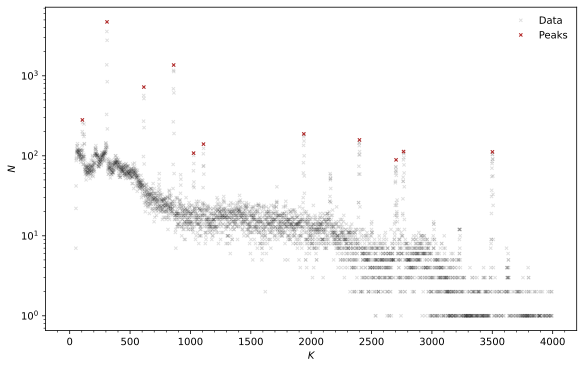

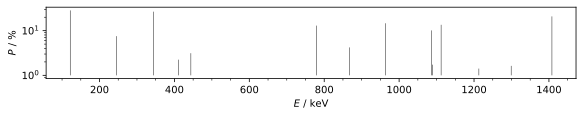

In [4]:
eu_E, eu_P = np.genfromtxt('data/eu-lit.txt', unpack=True)

eu_K = np.arange(len(eu))

eu_peak_ind = find_peaks(eu, distance=50, prominence=75)[0]
eu_peak = eu[eu_peak_ind]
eu_K_peak = eu_K[eu_peak_ind]

print(f'Peaks: {len(eu_peak_ind)}\n\n')
print(f'Channel Count\n')
print(f'{np.vstack((eu_K_peak, eu_peak)).T}')
    
plt.plot(eu_K[:4000], eu[:4000], 'kx', ms=3.21, alpha=0.125, label='Data')
plt.plot(eu_K_peak, eu_peak, 'x', c='firebrick', ms=3.21, label='Peaks')

plt.xlabel(r'$K$')
plt.ylabel(r'$N$')
plt.yscale('log')
plt.legend()

plt.show()
plt.close()

plt.figure(figsize=[8, 1.5])

plt.vlines(eu_E, 1, eu_P * 100, 'k', lw=0.45)

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$P$ / %')
plt.yscale('log')

plt.show()
plt.close()

eu_peak_ass = eu_peak[np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
eu_K_peak_ass = eu_K_peak[np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
eu_E_ass = eu_E[np.array([0, 1, 2, 3, 4, 5, 7, 8, 10, 13])]
eu_P_ass = eu_P[np.array([0, 1, 2, 3, 4, 5, 7, 8, 10, 13])]

##### Energie kalibrieren

Linear Fit: E(K) = aK + b

a = ( 0.4029 +- 0.0001) keV
b = (-2.5619 +- 0.2319) keV


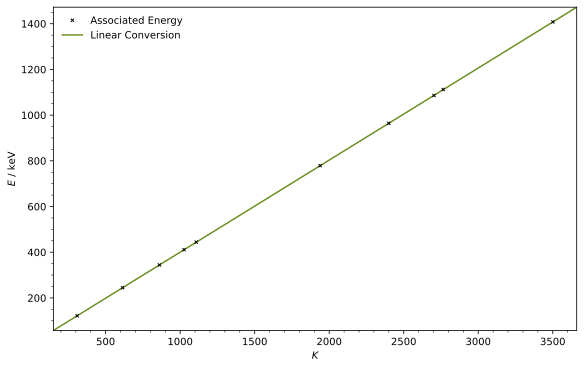

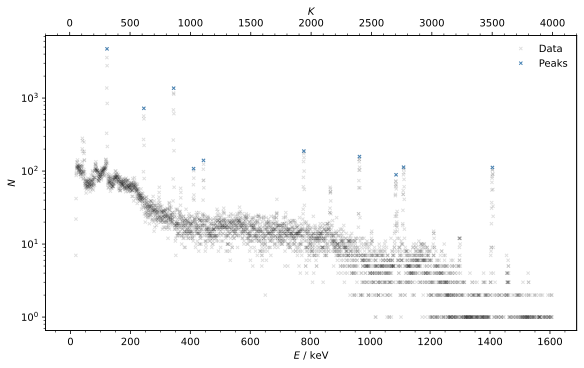

In [5]:
par, cov = np.polyfit(eu_K_peak_ass, eu_E_ass, deg=1, cov=True)
err = np.sqrt(np.diag(cov))

a = ufloat(par[0], err[0])
b = ufloat(par[1], err[1])

print(f'Linear Fit: E(K) = aK + b\n')
print(f'a = ( {a.n:.4f} +- {a.s:.4f}) keV')
print(f'b = ({b.n:.4f} +- {b.s:.4f}) keV')

def E(K):
    return a.n * K + b.n

plt.plot(eu_K_peak_ass, eu_E_ass, 'kx', ms=3.21, zorder=10, label='Associated Energy')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

x = np.array([-1e4, +1e4])

plt.plot(x, E(x), c='olivedrab', zorder=0, label='Linear Conversion')

plt.xlabel(r'$K$')
plt.ylabel(r'$E$ / keV')
plt.legend()

plt.show()
plt.close()

eu_K_in_E = E(eu_K)
eu_K_peak_ass_in_E = E(eu_K_peak_ass)

plt.plot(eu_K_in_E[:4000], eu[:4000], 'kx', ms=3.21, alpha=0.125, label='Data')
plt.plot(eu_K_peak_ass_in_E, eu_peak_ass, 'x', c='steelblue', ms=3.21, label='Peaks')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(eu_K[[0, 4000]], eu[[0, 4000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

##### Peaks modellieren

Gaussian Fit:

b =   96.867 +-  4.017
m =  121.867 +-  0.003
s =    0.456 +-  0.003
N = 5286.335 +- 28.063


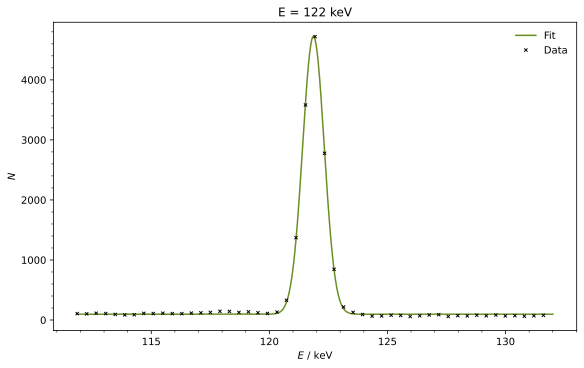

Gaussian Fit:

b =   37.967 +-  1.199
m =  244.785 +-  0.006
s =    0.522 +-  0.006
N =  895.509 +-  8.966


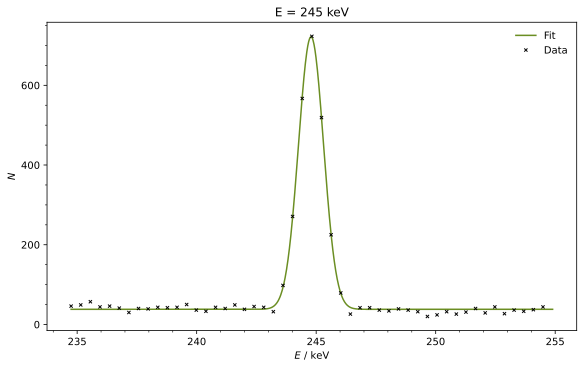

Gaussian Fit:

b =   20.009 +-  1.447
m =  344.306 +-  0.004
s =    0.638 +-  0.004
N = 2188.372 +- 11.964


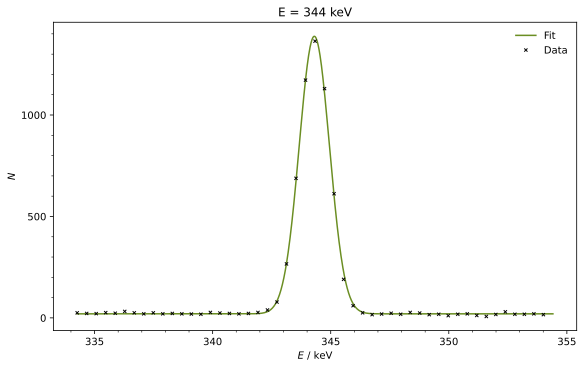

Gaussian Fit:

b =   17.158 +-  0.751
m =  411.091 +-  0.029
s =    0.644 +-  0.030
N =  145.899 +-  6.236


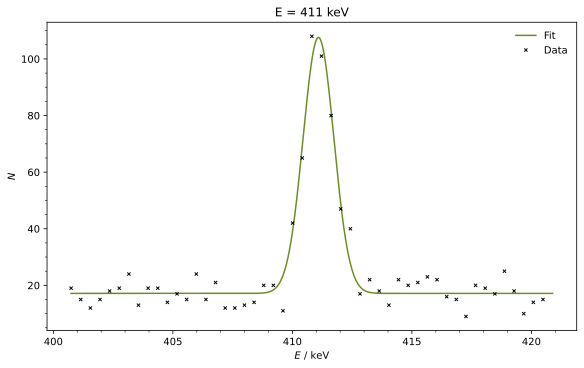

Gaussian Fit:

b =   16.848 +-  0.762
m =  443.916 +-  0.023
s =    0.705 +-  0.024
N =  208.953 +-  6.624


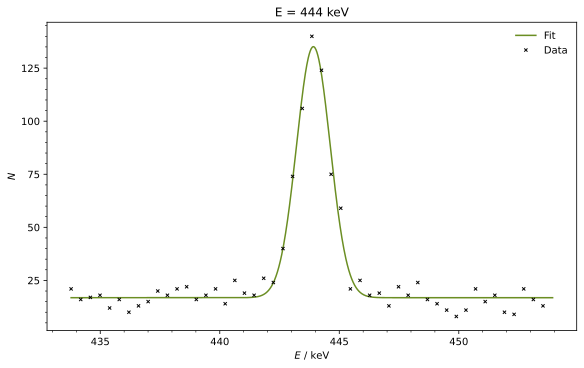

Gaussian Fit:

b =   12.699 +-  0.751
m =  778.722 +-  0.017
s =    0.963 +-  0.018
N =  434.746 +-  7.628


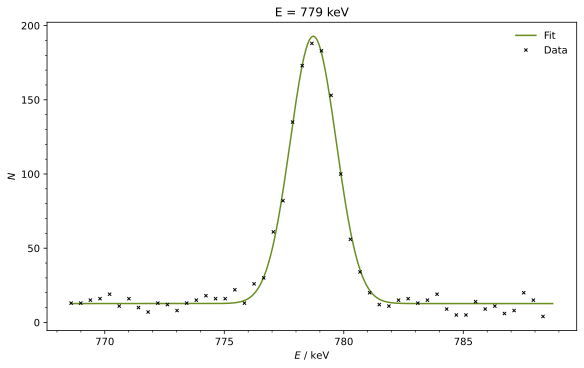

Gaussian Fit:

b =    5.979 +-  1.097
m =  963.874 +-  0.032
s =    1.213 +-  0.034
N =  453.283 +- 12.501


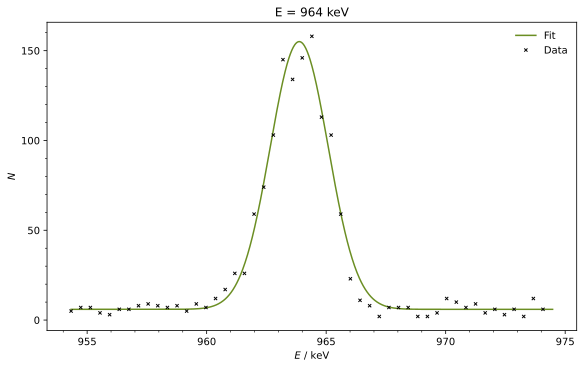

Gaussian Fit:

b =    7.351 +-  1.062
m = 1085.921 +-  0.068
s =    1.434 +-  0.075
N =  251.991 +- 13.163


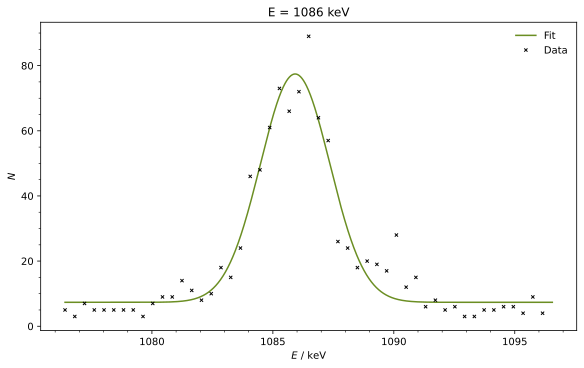

Gaussian Fit:

b =    5.638 +-  0.940
m = 1111.914 +-  0.040
s =    1.299 +-  0.043
N =  340.485 +- 11.095


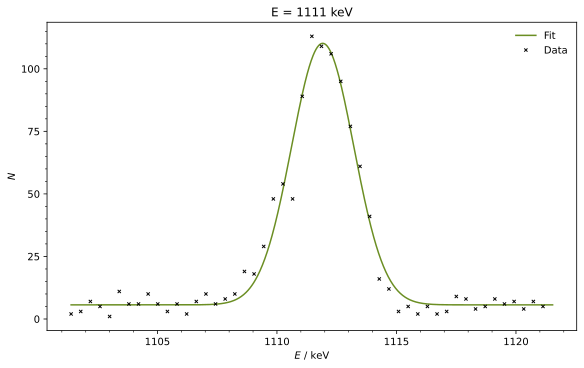

Gaussian Fit:

b =    0.974 +-  0.830
m = 1407.868 +-  0.035
s =    1.529 +-  0.039
N =  410.686 +- 10.625


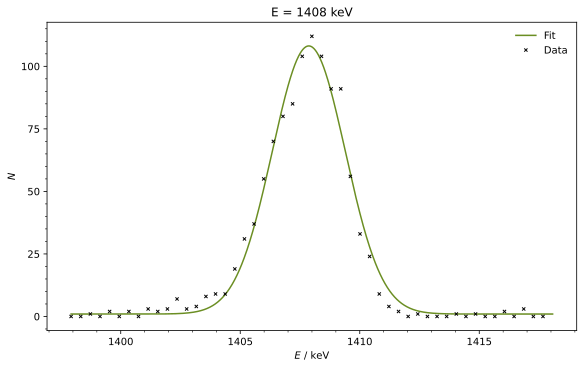

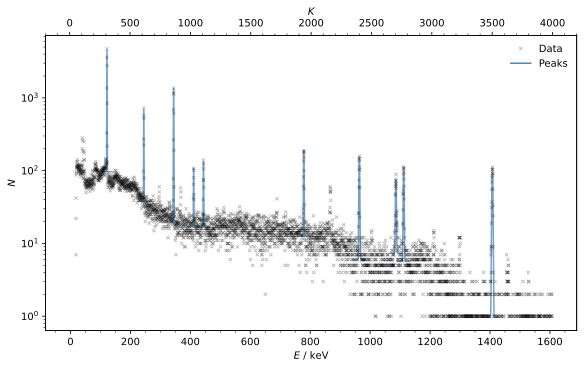

In [6]:
def gaussbg(x, b, m, s, N):
    return b + N / np.sqrt(2 * np.pi * s**2) * np.e**(-(x - m)**2 / (2 * s**2))

fits = [None] * len(eu_peak_ass)

i = 0

for row in zip(eu_K_peak_ass, eu_K_peak_ass_in_E, eu_peak_ass):
    K_lo = row[0] - 25
    K_hi = row[0] + 25

    m0 = row[1]
    N0 = row[2]

    par, cov = curve_fit(gaussbg, eu_K_in_E[K_lo:K_hi], eu[K_lo:K_hi], p0=[1, m0, 1, N0])
    err = np.sqrt(np.diag(cov))
    
    fit = uar(par, err)
    fits[i] = fit

    print(f'Gaussian Fit:\n')
    print(f'b = {fit[0].n:8.3f} +- {fit[0].s:6.3f}')
    print(f'm = {fit[1].n:8.3f} +- {fit[1].s:6.3f}')
    print(f's = {fit[2].n:8.3f} +- {fit[2].s:6.3f}')
    print(f'N = {fit[3].n:8.3f} +- {fit[3].s:6.3f}')

    x = np.linspace(eu_K_in_E[K_lo], eu_K_in_E[K_hi], 1000)
    
    plt.plot(x, gaussbg(x, *noms(fit)), c='olivedrab', label='Fit')
    plt.plot(eu_K_in_E[K_lo:K_hi], eu[K_lo:K_hi], 'kx', ms=3.21, label='Data')
    
    plt.locator_params(axis='x', nbins=8)
    plt.locator_params(axis='y', nbins=6)
    
    plt.xlabel(r'$E$ / keV')
    plt.ylabel(r'$N$')
    plt.title(f'E = {m0:.0f} keV')
    plt.legend()

    plt.show()
    plt.close()
    
    i += 1

fits = np.array(fits)

j = 0

for row in eu_K_peak_ass:
    K_lo = row - 50
    K_hi = row + 50
    
    x = np.linspace(eu_K_in_E[K_lo], eu_K_in_E[K_hi], 100)
    
    plt.plot(x, gaussbg(x, *noms(fits[j,:])), c='steelblue', alpha=0.75)
    
    j += 1

plt.plot(eu_K_in_E[:4000], eu[:4000], 'kx', ms=3.21, alpha=0.25, label='Data')

plt.yscale('log')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([-10000, -9999], [0, 0], c='steelblue', label='Peaks')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(eu_K[[0, 4000]], eu[[0, 4000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

##### Effizienz fitten

Nonlinear Fit:

a = 5.3097 +- 0.1710
b = 0.9956 +- 0.0002
c = 0.4396 +- 0.0327


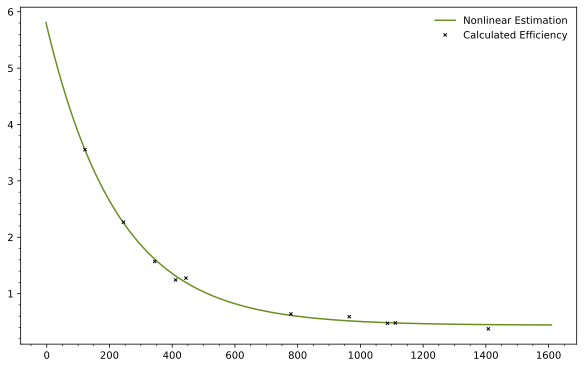

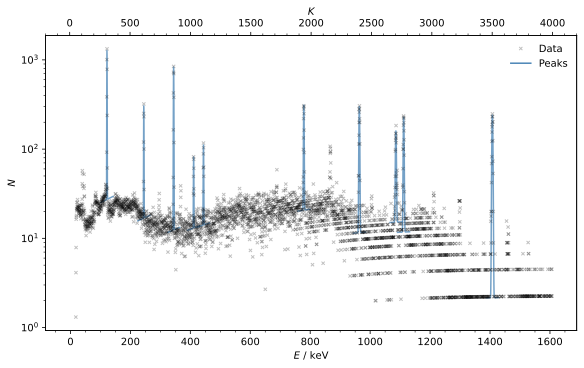

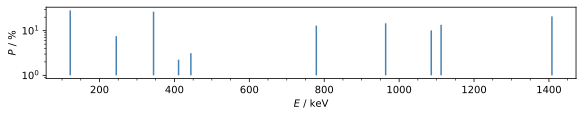

In [7]:
def Q(N, A, t, W, Om):
    return N / (A * t * W) * 4 * np.pi / Om

eu_N = fits[:,3]
eu_A = ufloat(1233, 18)
Om = 0.01346

eu_Q = Q(eu_N, eu_A, t_eu, eu_P_ass, Om)

def fit(x, a, b, c):
    return a * b**x + c

par, cov = curve_fit(fit, eu_K_peak_ass_in_E, noms(eu_Q))
err = np.sqrt(np.diag(cov))

q = uar(par, err)

print(f'Nonlinear Fit:\n')
print(f'a = {q[0].n:.4f} +- {q[0].s:.4f}')
print(f'b = {q[1].n:.4f} +- {q[1].s:.4f}')
print(f'c = {q[2].n:.4f} +- {q[2].s:.4f}')

def trueN(N, E):
    return N / fit(E, *noms(q))

x = np.linspace(eu_K_in_E[0], eu_K_in_E[4000], 1000)

plt.plot(x, fit(x, *noms(q)), c='olivedrab', label='Nonlinear Estimation')
plt.plot(eu_K_peak_ass_in_E, noms(eu_Q), 'kx', ms=3.21, label='Calculated Efficiency')

plt.legend()

plt.show()
plt.close()

j = 0

for row in eu_K_peak_ass:
    K_lo = row - 50
    K_hi = row + 50
    
    x = np.linspace(eu_K_in_E[K_lo], eu_K_in_E[K_hi], 100)
    
    plt.plot(x, trueN(gaussbg(x, *noms(fits[j,:])), x), c='steelblue', alpha=0.75)
    
    j += 1

plt.plot(eu_K_in_E[:4000], trueN(eu[:4000], eu_K_in_E[:4000]), 'kx', ms=3.21, alpha=0.25, label='Data')

plt.yscale('log')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([-10000, -9999], [0, 0], c='steelblue', label='Peaks')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$N$')
plt.legend()

plt.gca().twiny()
plt.plot(eu_K[[0, 4000]], eu[[0, 4000]], alpha=0)

plt.xlabel(r'$K$')
plt.yscale('log')

plt.show()
plt.close()

plt.figure(figsize=[8, 1.5])

plt.vlines(eu_E_ass, 1, eu_P_ass * 100, color='steelblue')

plt.xlabel(r'$E$ / keV')
plt.ylabel(r'$P$ / %')
plt.yscale('log')

plt.show()
plt.close()

#### Cs-137